# 시각화 도구
# Seanborn 라이브러리 - 고급 그래프 도구

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 회귀선이 있는 산점도

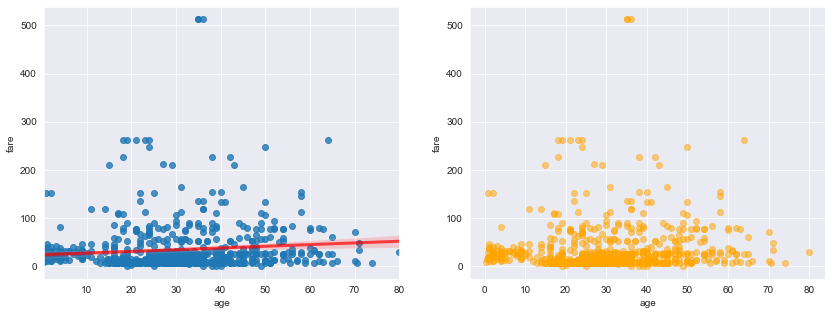

In [5]:
# 스타일 테마 설정 (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기
sns.regplot(x='age', y='fare', data=titanic, ax=ax1, line_kws={'color':'r', 'alpha':0.7, 'lw':3})  #line_kws(색상, 투명도, 너비)

sns.regplot(x='age', y='fare', data=titanic, ax=ax2, scatter_kws={'color':'orange', 'alpha':0.5}, fit_reg=False)  

plt.show()

## 히트맵

In [ ]:
# 히트맵 : 2개의 범주형 변수를 각각 x, y축에 두고 데이터를 매트릭스 형태로 분류

In [6]:
sns.set_style('darkgrid')

# pivot_table : 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
table.head()

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


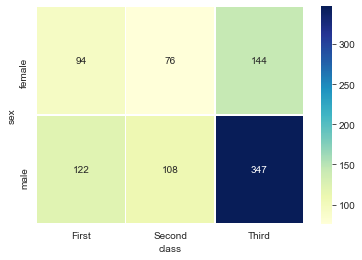

In [8]:
# 히트맵 그리기
sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu', linewidth=.5, cbar=True)

plt.show()

## 막대 그래프

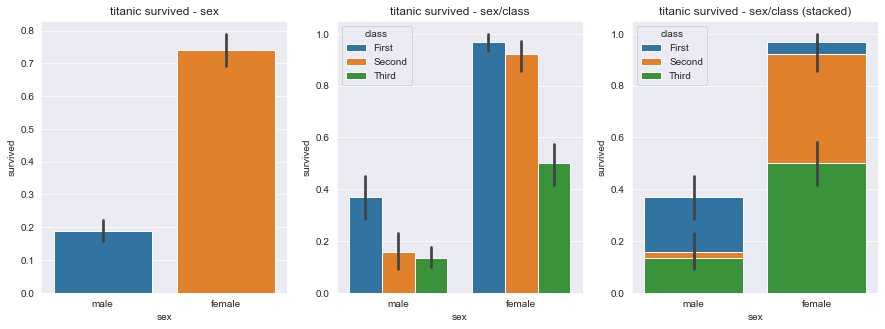

In [11]:
# figuer에 3개의 서브 플롯을 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본 : x, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# 누적출력
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax3, dodge=False)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class (stacked)')

plt.show()

## 조인트 그래프

In [ ]:
# 산점도 기본으로 표시하고 x, y축에 각 변수에 대한 히스토그램을 동시에 보여줌.
# 두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하고자 할 때

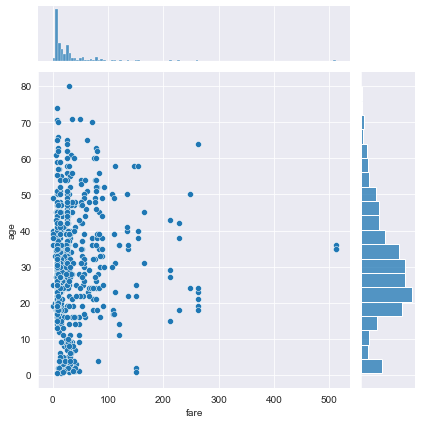

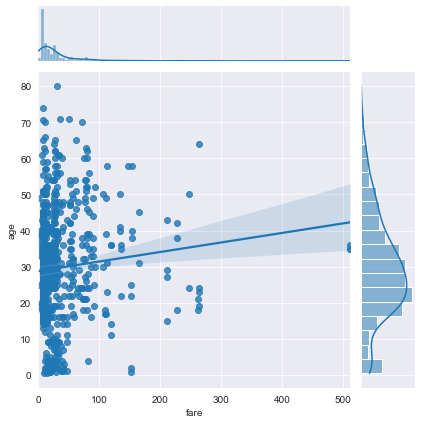

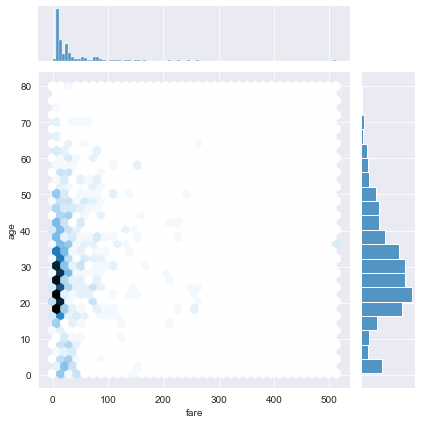

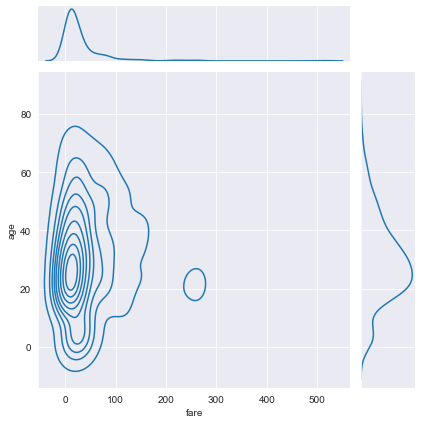

In [12]:
# 1) 산점도 , 히스토그램 (default)
j1 = sns.jointplot(x='fare', y='age', data=titanic)

# 2) 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)

# 3) 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)

# 4) 커널/밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

plt.show()

## 박스플롯/바이올린 그래프

In [ ]:
# 박스플롯만으로는 데이터가 퍼져있는 분산의 정도를 정확하게 알기 어려우므로 커널 밀도 함수를 추가하여 그 정보를 알수 있도록 하는 그래프

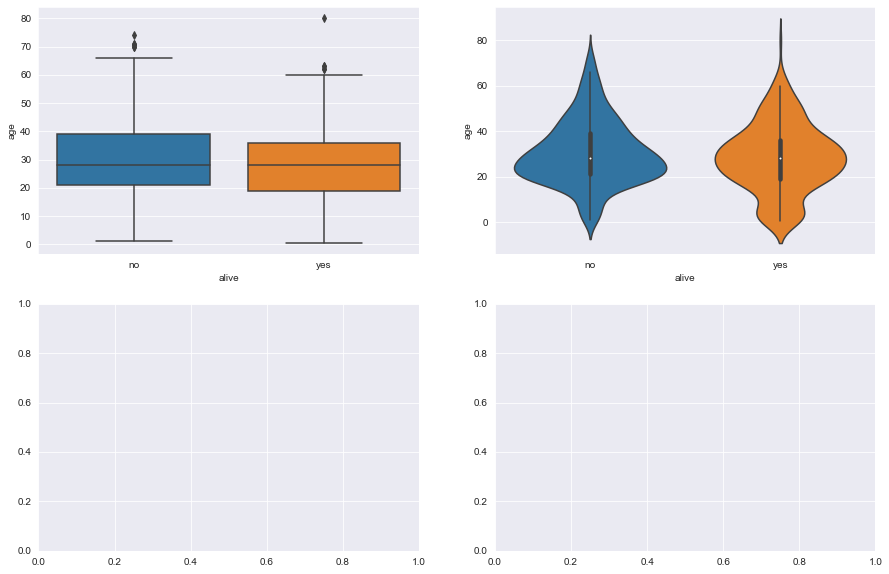

In [14]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 박스 그래프
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# 바이올린 그래프
sns.violinplot(x='alive', y='age', data=titanic, ax=ax2)

plt.show()